# Rで楽しむ統計

Data from https://github.com/okumuralab/RforFun/tree/master/data

In [99]:
!wget -q https://raw.githubusercontent.com/okumuralab/RforFun/master/data/rika_hist.csv -O ./data/rika_hist.csv
!wget -q https://raw.githubusercontent.com/okumuralab/RforFun/master/data/rika.csv -O ./data/rika.csv

In [100]:
df_pref = pd.read_csv('./data/rika.csv')
df_pref.head()

,都道府県,生徒数,平均正答数
0,北海道,40952,13.3
1,青森県,11294,13.5
2,岩手県,11191,12.7
3,宮城県,19845,13.4
4,秋田県,8160,14.9


In [101]:
df = pd.read_csv('./data/rika_hist.csv')
df.head()

,正答数,生徒数
0,0,2247
1,1,4449
2,2,10774
3,3,19983
4,4,29385


In [78]:
df.sum()

正答数        325
生徒数    1056754
dtype: int64

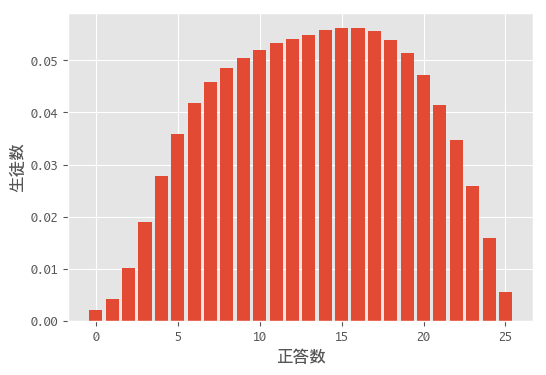

In [89]:
plt.bar(df['正答数'], df['生徒数']/df['生徒数'].sum())
plt.ylabel('生徒数')
plt.xlabel('正答数')

集計値だと扱いづらいので、正答数の生データに戻す

In [69]:
def to_point_array(row):
    return [row['正答数']] * row['生徒数']
df['raw'] = df.apply(to_point_array, axis=1)

In [70]:
df.head()

,正答数,生徒数,raw
0,0,2247,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,4449,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,2,10774,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
3,3,19983,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."
4,4,29385,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."


In [72]:
raw = []
for r in df['raw'].values:
    raw.extend(r)

In [81]:
# sum(x$生徒数)
len(raw)

1056754

In [91]:
# 平均正答数
np.mean(raw)

13.367853824068799

> 標準偏差は `sd(rep(x$正答数, x$生徒数))` で5.74ほどである

In [114]:
np.std(raw)

5.7392782590913924

> 都道府県ごとの平均正答数の標準偏差はこれに `sqrt(mean(1/y$生徒数))` を掛けて0.05ほどのはずであるが

In [112]:
# sqrt(mean(1/y$生徒数))
np.sqrt((1/df_pref['生徒数']).mean())

0.0088213481355912567

In [111]:
5.7392782590913924 * 0.0088213481355912567

0.050628171570475285

ここでやっている事  
独立な確率変数の和の分散をみている  
生徒の数だけ独立な変数を足したら分散は同じだけ増えるから標準偏差はその平方根  
都道府県の平均はその確率変数を生徒数で割ったやつだから平方根の逆数  
概算として平均生徒数を使った

> 実際にはrika.csvからわかるように0.72ほどである

In [115]:
df_pref['平均正答数'].std()

0.71773489935625367